In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
# Step 2: Open and Read the JSON File
with open('D:/shuvo/bangla_news_classification/dataset/pro-part-1.json', 'r') as json_file:
    json_data = json_file.read()

# Step 3: Parse the JSON Data
parsed_data = json.loads(json_data)

In [3]:
# Step 4: Print the Content
print(parsed_data[:2])

[{'tags': [], 'headline': 'বান্দরবানে জুমের ধান ভরিয়েছে চাষির প্রাণ', 'content_type': 'story', 'content_id': '7c1d7dcb-8bac-465c-9184-c619f2022df5', 'url': 'https://www.prothomalo.com/bangladesh/বান্দরবানে-জুমের-ধান-ভরিয়েছে-চাষির-প্রাণ', 'body': ['<p>বান্দরবানে অরণ্যঘেরা চিম্বুক পাহাড়ের গায়ে জুমের পাকা ধানের খেতগুলো সোনালি রঙের আলপনার মতো মনে হয়। জুমের ঘরে আদিবাসী তরুণ-তরুণীরা মেতেছে নাচে-গানে। পাকা ধানের ম-ম গন্ধে ভরে উঠেছে জুমচাষিদের জনপদগুলো। সেখানে এখন আনন্দের বন্যা। গত ৬ সেপ্টেম্বর চিম্বুক পাহাড়ে গিয়ে এ রকম দৃশ্যই দেখা গেছে। চিম্বুকের নোয়াপাড়া এলাকায় পিঠে ঝুড়ি ঝুলিয়ে ধান কাটছিলেন পাঁচ ম্রো তরুণ-তরুণী। লংরিং ম্রো অনাবিল হাসি ছড়িয়ে বললেন, রামলা ও বনলায় (ম্রো ভাষায় ভাদ্র-আশ্বিন মাসের নাম) জুমের ধান পাকলে জুমিয়াদের আর কোনো অভাব থাকে না। এ জন্য এ দুই মাসকে সুখের মাস বলা হয়। প্রায় দুই হাজার ফুট উঁচু চিম্বুক পাহাড়ের যেদিকে চোখ যায়, দেখা মেলে শুধু সবুজ বনের মাঝে পাকা ধানখেত। পাহাড়ের চূড়া থেকে প্রায় ৫০০ ফুট নিচে নেমে রামরি পাড়া এলাকার একটি জুমের ঘরে গিয়ে দেখা যায় ম্রো তরুণ-তরুণীরা মহানন্দে

In [4]:
# Step 2: Create a DataFrame from JSON Data
df = pd.DataFrame(parsed_data)
df.head()

,tags,headline,content_type,content_id,url,body,added_time,updated_time,general_type
0,[],বান্দরবানে জুমের ধান ভরিয়েছে চাষির প্রাণ,story,7c1d7dcb-8bac-465c-9184-c619f2022df5,https://www.prothomalo.com/bangladesh/বান্দরবা...,[<p>বান্দরবানে অরণ্যঘেরা চিম্বুক পাহাড়ের গায়ে ...,1585254016502,1600110641139,[bangladesh]
1,[],বিষাক্ত স্পিরিট পানে আরেকজনের মৃত্যু!,story,908b318b-d234-4327-aed5-248a1b10e130,https://www.prothomalo.com/bangladesh/বিষাক্ত-...,[<p>কুষ্টিয়ার দৌলতপুরে বিষাক্ত স্পিরিট পান করা...,1585254016270,1600110640784,[bangladesh]
2,[],দুর্বৃত্তের গুলিতে গৃহবধূ স্বামীর হাতে স্ত্রী খুন,story,5a65bcd7-7132-4e10-8759-5adecee23bd2,https://www.prothomalo.com/bangladesh/দুর্বৃত্...,[<p>সুনামগঞ্জের বিশ্বম্ভরপুরে স্বামীর ছুরিকাঘা...,1585254016047,1600110640532,[bangladesh]
3,[],অগ্নিদগ্ধ গৃহবধূ আফরোজা অবশেষে মারা গেলেন,story,6bac6e29-cd21-4a02-810c-1836fc1f3285,https://www.prothomalo.com/bangladesh/অগ্নিদগ্...,[<p>আট দিন মৃত্যুর সঙ্গে লড়ে অবশেষে নিভে গেল অ...,1585254015813,1600110640281,[bangladesh]
4,[],পুরোনো সরঞ্জাম দিয়ে মিলনায়তন সংস্কার!,story,f3979461-6851-4837-95af-9fd177660dfc,https://www.prothomalo.com/bangladesh/পুরোনো-স...,[<p>মাদারীপুরের রাজৈর উপজেলা পরিষদ মিলনায়তন সং...,1585254015581,1600110640022,[bangladesh]


In [5]:
df.shape, df.columns

((90000, 9),
 Index(['tags', 'headline', 'content_type', 'content_id', 'url', 'body',
        'added_time', 'updated_time', 'general_type'],
       dtype='object'))

In [6]:
df['general_type'] = df['general_type'].str[0]
df['body'] = df['body'].str[0].str.replace('<p>', '').replace('</p>', '')
df

,tags,headline,content_type,content_id,url,body,added_time,updated_time,general_type
0,[],বান্দরবানে জুমের ধান ভরিয়েছে চাষির প্রাণ,story,7c1d7dcb-8bac-465c-9184-c619f2022df5,https://www.prothomalo.com/bangladesh/বান্দরবা...,বান্দরবানে অরণ্যঘেরা চিম্বুক পাহাড়ের গায়ে জুমে...,1585254016502,1600110641139,bangladesh
1,[],বিষাক্ত স্পিরিট পানে আরেকজনের মৃত্যু!,story,908b318b-d234-4327-aed5-248a1b10e130,https://www.prothomalo.com/bangladesh/বিষাক্ত-...,কুষ্টিয়ার দৌলতপুরে বিষাক্ত স্পিরিট পান করা ব্য...,1585254016270,1600110640784,bangladesh
2,[],দুর্বৃত্তের গুলিতে গৃহবধূ স্বামীর হাতে স্ত্রী খুন,story,5a65bcd7-7132-4e10-8759-5adecee23bd2,https://www.prothomalo.com/bangladesh/দুর্বৃত্...,সুনামগঞ্জের বিশ্বম্ভরপুরে স্বামীর ছুরিকাঘাতে স...,1585254016047,1600110640532,bangladesh
3,[],অগ্নিদগ্ধ গৃহবধূ আফরোজা অবশেষে মারা গেলেন,story,6bac6e29-cd21-4a02-810c-1836fc1f3285,https://www.prothomalo.com/bangladesh/অগ্নিদগ্...,আট দিন মৃত্যুর সঙ্গে লড়ে অবশেষে নিভে গেল অগ্নি...,1585254015813,1600110640281,bangladesh
4,[],পুরোনো সরঞ্জাম দিয়ে মিলনায়তন সংস্কার!,story,f3979461-6851-4837-95af-9fd177660dfc,https://www.prothomalo.com/bangladesh/পুরোনো-স...,মাদারীপুরের রাজৈর উপজেলা পরিষদ মিলনায়তন সংস্কা...,1585254015581,1600110640022,bangladesh
...,...,...,...,...,...,...,...,...,...
89995,[],২১ প্রতিষ্ঠানকে দেড় লাখ টাকা জরিমানা,story,1aafaaee-ca55-4734-851c-76b273363c54,https://www.prothomalo.com/business/২১-প্রতিষ্...,অস্বাস্থ্যকর ও নোংরা পরিবেশে খাদ্য তৈরি এবং মে...,1585270323256,1600169882810,business
89996,[],রপ্তানি বাড়াতে নতুন বাজার সম্প্রসারণের কাজ চলছে,story,6ab9e11a-5d15-45d1-9b4c-13b40b6c3aac,https://www.prothomalo.com/business/রপ্তানি-বা...,রপ্তানি প্রবৃদ্ধি বাড়াতে সরকার নতুন নতুন পণ্য ...,1585270323015,1600169882398,business
89997,[],পঞ্চম দিনে ২৭৫ কোটি টাকা আয়,story,2e37b085-46a8-4a39-815c-ead0c4be75b1,https://www.prothomalo.com/business/পঞ্চম-দিনে...,দেশের সবকটি বিভাগীয় শহরে অনুষ্ঠানরত আয়কর মেলায়...,1585270322771,1600169882098,business
89998,[],সার্ক অঞ্চলে অর্থনৈতিক সুফল পেতে রাজনৈতিক সদিচ...,story,3d378519-a2c4-4599-b73c-49df9657b5a5,https://www.prothomalo.com/business/সার্ক-অঞ্চ...,সার্ক অঞ্চলে অর্থনৈতিক সুফল পেতে রাজনৈতিক সদিচ...,1585270322526,1600169881794,business


In [7]:
df = df[['general_type', 'body']]
df

,general_type,body
0,bangladesh,বান্দরবানে অরণ্যঘেরা চিম্বুক পাহাড়ের গায়ে জুমে...
1,bangladesh,কুষ্টিয়ার দৌলতপুরে বিষাক্ত স্পিরিট পান করা ব্য...
2,bangladesh,সুনামগঞ্জের বিশ্বম্ভরপুরে স্বামীর ছুরিকাঘাতে স...
3,bangladesh,আট দিন মৃত্যুর সঙ্গে লড়ে অবশেষে নিভে গেল অগ্নি...
4,bangladesh,মাদারীপুরের রাজৈর উপজেলা পরিষদ মিলনায়তন সংস্কা...
...,...,...
89995,business,অস্বাস্থ্যকর ও নোংরা পরিবেশে খাদ্য তৈরি এবং মে...
89996,business,রপ্তানি প্রবৃদ্ধি বাড়াতে সরকার নতুন নতুন পণ্য ...
89997,business,দেশের সবকটি বিভাগীয় শহরে অনুষ্ঠানরত আয়কর মেলায়...
89998,business,সার্ক অঞ্চলে অর্থনৈতিক সুফল পেতে রাজনৈতিক সদিচ...


In [8]:
df.dropna(inplace=True)
# Remove duplicates in 'body' column, keeping the first occurrence
df.drop_duplicates(subset='body', keep='first',inplace=True)
df.reset_index(inplace=True, drop=True)
df.head(), df.shape

C:\Users\SSROY\AppData\Local\Temp\ipykernel_16244\3287021994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\SSROY\AppData\Local\Temp\ipykernel_16244\3287021994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='body', keep='first',inplace=True)


(  general_type                                               body
 0   bangladesh  বান্দরবানে অরণ্যঘেরা চিম্বুক পাহাড়ের গায়ে জুমে...
 1   bangladesh  কুষ্টিয়ার দৌলতপুরে বিষাক্ত স্পিরিট পান করা ব্য...
 2   bangladesh  সুনামগঞ্জের বিশ্বম্ভরপুরে স্বামীর ছুরিকাঘাতে স...
 3   bangladesh  আট দিন মৃত্যুর সঙ্গে লড়ে অবশেষে নিভে গেল অগ্নি...
 4   bangladesh  মাদারীপুরের রাজৈর উপজেলা পরিষদ মিলনায়তন সংস্কা...,
 (89028, 2))

In [9]:
n = len(df['body'].unique())
unique_label = len(df['general_type'].unique())
n,unique_label

(89028, 11)

In [10]:
df['general_type'].unique()

array(['bangladesh', 'world', 'feature', 'old-prothomalo', 'opinion',
       'education', 'entertainment', 'sports', 'business', 'onnoalo',
       '1971.prothomalo.com'], dtype=object)

In [11]:
# df = df.sample(m, replace=False)
# df.reset_index(inplace=True)
# # df.drop(['level_0', 'index'], inplace = True)
# df

In [12]:
# Print the content of the first 'body' entry
first_body_content = df.loc[0, 'body']
print(first_body_content)

বান্দরবানে অরণ্যঘেরা চিম্বুক পাহাড়ের গায়ে জুমের পাকা ধানের খেতগুলো সোনালি রঙের আলপনার মতো মনে হয়। জুমের ঘরে আদিবাসী তরুণ-তরুণীরা মেতেছে নাচে-গানে। পাকা ধানের ম-ম গন্ধে ভরে উঠেছে জুমচাষিদের জনপদগুলো। সেখানে এখন আনন্দের বন্যা। গত ৬ সেপ্টেম্বর চিম্বুক পাহাড়ে গিয়ে এ রকম দৃশ্যই দেখা গেছে। চিম্বুকের নোয়াপাড়া এলাকায় পিঠে ঝুড়ি ঝুলিয়ে ধান কাটছিলেন পাঁচ ম্রো তরুণ-তরুণী। লংরিং ম্রো অনাবিল হাসি ছড়িয়ে বললেন, রামলা ও বনলায় (ম্রো ভাষায় ভাদ্র-আশ্বিন মাসের নাম) জুমের ধান পাকলে জুমিয়াদের আর কোনো অভাব থাকে না। এ জন্য এ দুই মাসকে সুখের মাস বলা হয়। প্রায় দুই হাজার ফুট উঁচু চিম্বুক পাহাড়ের যেদিকে চোখ যায়, দেখা মেলে শুধু সবুজ বনের মাঝে পাকা ধানখেত। পাহাড়ের চূড়া থেকে প্রায় ৫০০ ফুট নিচে নেমে রামরি পাড়া এলাকার একটি জুমের ঘরে গিয়ে দেখা যায় ম্রো তরুণ-তরুণীরা মহানন্দে ধান মাড়াই করছেন। জামিনি পাড়া এলাকায় জুমে কথা হয় মেনফা ম্রোর সঙ্গে। তিনি বলেন, ‘আমার দুই একর জুম থেকে দুই-আড়াই শ আঢ়ি (এক আঢ়িতে ১০ কেজি) ধান পাব বলে আশা করছি। এ ছাড়া মরিচ, তুলা, তিলসহ অন্য ফসলও রয়েছে। সাবেক ইউপি সদস্য চিংক্লাং ম্রো জানান, এবার জুম চাষ 

In [13]:
gen_type_counts = df['general_type'].value_counts()
gen_type_counts

bangladesh             26517
old-prothomalo         21818
sports                  9485
feature                 7553
entertainment           6062
world                   5215
business                4353
education               4275
opinion                 2960
onnoalo                  789
1971.prothomalo.com        1
Name: general_type, dtype: int64

In [18]:
import random
# Filter gen_type values based on count criteria
filtered_gen_types = gen_type_counts[(gen_type_counts > 500) & (gen_type_counts < 5000)]

random_classes_number = random.randint(3, 6)
print(random_classes_number)
# Ensure we have at least 5 gen_type values that meet the criteria
if len(filtered_gen_types) >= random_classes_number:
    # Randomly select 5 gen_type values from the filtered list
    random_gen_types = np.random.choice(filtered_gen_types.index, random_classes_number, replace=False)
    print("Randomly selected gen_type values:")
    print(random_gen_types)
else:
    print("Not enough gen_type values meeting the criteria.")

4
Randomly selected gen_type values:
['business' 'education' 'opinion' 'onnoalo']


In [19]:
# Create a list of specific categories
categories = random_gen_types

# Use boolean indexing to filter rows based on the 'Section' column
df = df[df['general_type'].isin(categories)]
df.reset_index(inplace=True, drop=True)
# Print the new DataFrame
df

,general_type,body
0,opinion,লোগাং একটা নদীর নাম। একটা ঐতিহাসিক জায়গার নামও...
1,opinion,জার্মানির কেন্দ্রীয় ব্যাংকের পরিচালনা পরিষদের ...
2,education,যতি বা ছেদ চিহ্নের লিখন কৌশলপ্রিয় শিক্ষার্থীরা...
3,education,সংক্ষেপে উত্তর  পর্ব-২ \ অংশ-৮প্রিয় শিক্ষার্থ...
4,education,রচনামূলক প্রশ্নোত্তর অংশ-৫ প্রিয় শিক্ষার্থীর...
...,...,...
12372,business,অস্বাস্থ্যকর ও নোংরা পরিবেশে খাদ্য তৈরি এবং মে...
12373,business,রপ্তানি প্রবৃদ্ধি বাড়াতে সরকার নতুন নতুন পণ্য ...
12374,business,দেশের সবকটি বিভাগীয় শহরে অনুষ্ঠানরত আয়কর মেলায়...
12375,business,সার্ক অঞ্চলে অর্থনৈতিক সুফল পেতে রাজনৈতিক সদিচ...


In [20]:
df['general_type'].value_counts()

business     4353
education    4275
opinion      2960
onnoalo       789
Name: general_type, dtype: int64

In [21]:
each_class= df['general_type'].value_counts()
each_class.sum()

12377

<Axes: >

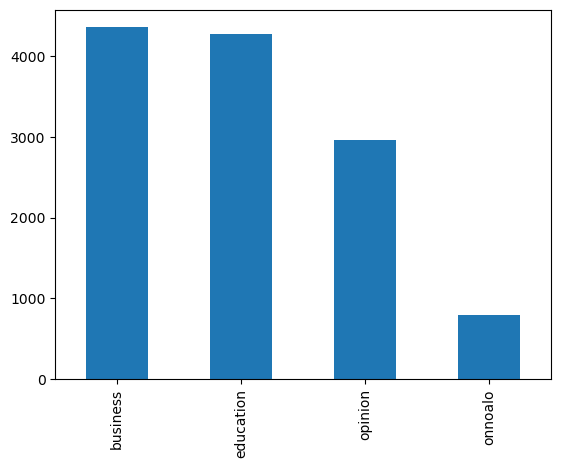

In [22]:
each_class.plot.bar()

In [23]:
X = df['body']
y=df['general_type']
X,y

(0        লোগাং একটা নদীর নাম। একটা ঐতিহাসিক জায়গার নামও...
 1        জার্মানির কেন্দ্রীয় ব্যাংকের পরিচালনা পরিষদের ...
 2        যতি বা ছেদ চিহ্নের লিখন কৌশলপ্রিয় শিক্ষার্থীরা...
 3        সংক্ষেপে উত্তর  পর্ব-২ \ অংশ-৮প্রিয় শিক্ষার্থ...
 4        রচনামূলক প্রশ্নোত্তর অংশ-৫ প্রিয় শিক্ষার্থীর...
                                ...                        
 12372    অস্বাস্থ্যকর ও নোংরা পরিবেশে খাদ্য তৈরি এবং মে...
 12373    রপ্তানি প্রবৃদ্ধি বাড়াতে সরকার নতুন নতুন পণ্য ...
 12374    দেশের সবকটি বিভাগীয় শহরে অনুষ্ঠানরত আয়কর মেলায়...
 12375    সার্ক অঞ্চলে অর্থনৈতিক সুফল পেতে রাজনৈতিক সদিচ...
 12376    ঢাকার মহাখালীতে গত মঙ্গলবার থেকে সোস্যাল ইসলাম...
 Name: body, Length: 12377, dtype: object,
 0          opinion
 1          opinion
 2        education
 3        education
 4        education
            ...    
 12372     business
 12373     business
 12374     business
 12375     business
 12376     business
 Name: general_type, Length: 12377, dtype: object)

In [24]:
## Get the Dependent features
classes = list(y.unique())
classes, df.nunique()

(['opinion', 'education', 'business', 'onnoalo'],
 general_type        4
 body            12377
 dtype: int64)

In [25]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y, len(y)

(array([3, 3, 1, ..., 0, 0, 0]), 12377)

In [26]:
import numpy as np
unique_values, counts = np.unique(y, return_counts=True)
print(unique_values, counts)

[0 1 2 3] [4353 4275  789 2960]


In [27]:
import re
from temp_stemmer.bangla_stemmer.stemmer.stemmer import BanglaStemmer  # for stemming 
st_words = ('অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ', 'অনুভূত', 'অনুযায়ী', 'অনুরূপ', 'অনুসন্ধান', 'অনুসরণ', 'অনুসারে', 'অনুসৃত', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অন্যত্র', 'অন্যভাবে', 'অন্যান্য', 'অপেক্ষাকৃতভাবে', 'অবধি', 'অবশ্য', 'অবশ্যই', 'অবস্থা', 'অবিলম্বে', 'অভ্যন্তরস্থ', 'অর্জিত', 'অর্থাত', 'অসদৃশ', 'অসম্ভাব্য', 'আইন', 'আউট', 'আক্রান্ত', 'আগামী', 'আগে', 'আগেই', 'আগ্রহী', 'আছে', 'আজ', 'আট', 'আদেশ', 'আদ্যভাগে', 'আন্দাজ', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদিগের', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'আশি', 'আশু', 'আসা', 'আসে', 'ই', 'ইচ্ছা', 'ইচ্ছাপূর্বক', 'ইতিমধ্যে', 'ইতোমধ্যে', 'ইত্যাদি', 'ইশারা', 'ইহা', 'ইহাতে', 'উক্তি', 'উচিত', 'উচ্চ', 'উঠা', 'উত্তম', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'উপলব্ধ', 'উপায়', 'উভয়', 'উল্লেখ', 'উল্লেখযোগ্যভাবে', 'উহার', 'ঊর্ধ্বতন', 'এ', 'এপর্যন্ত', 'এঁদের', 'এঁরা', 'এই', 'এইগুলো', 'এইভাবে', 'এক', 'একই', 'একটি', 'একদা', 'একবার', 'একভাবে', 'একরকম', 'একসঙ্গে', 'একা', 'একে', 'এক্', 'এখন', 'এখনও', 'এখনো', 'এখানে', 'এখানেই', 'এছাড়াও', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতদ্বারা', 'এতে', 'এদিকে', 'এদের', 'এপর্যন্ত', 'এবং', 'এবার', 'এমন', 'এমনকি', 'এমনকী', 'এমনি', 'এর', 'এরকম', 'এরা', 'এল', 'এলাকায়', 'এলাকার', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'ওহে', 'কক্ষ', 'কখন', 'কখনও', 'কত', 'কবে', 'কম', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করলো', 'করা', 'করাই', 'করাত', 'করার', 'করায়', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিল', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কর্তব্য', 'কাউকে', 'কাছ', 'কাছাকাছি', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কারণসমূহ', 'কারো', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিছুটা', 'কিছুনা', 'কিনা', 'কিন্তু', 'কিভাবে', 'কী', 'কূপ', 'কে', 'কেউ', 'কেউই', 'কেউনা', 'কেখা', 'কেন', 'কেবল', 'কেবা', 'কেস', 'কেহ', 'কোটি', 'কোথা', 'কোথাও', 'কোথায়', 'কোন', 'কোনও', 'কোনো', 'ক্রম', 'ক্ষেত্রে', 'কয়েক', 'কয়েকটি', 'খুঁজছেন', 'খুব', 'খোলা', 'খোলে', 'গড়', 'গত', 'গিয়ে', 'গিয়েছিলাম', 'গিয়েছে', 'গিয়ে', 'গিয়েছে', 'গুরুত্ব', 'গুলি', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'গোষ্ঠীবদ্ধ', 'গ্রহণ', 'গ্রুপ', 'ঘর', 'ঘোষণা', 'চলে', 'চান', 'চায়', 'চার', 'চালা', 'চালান', 'চালু', 'চায়', 'চেয়ে', 'চেয়েছিলেন', 'চেষ্টা', 'চেয়ে', 'ছয়', 'ছাড়া', 'ছাড়াছাড়ি', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'ছোট', 'জন', 'জনকে', 'জনাব', 'জনাবা', 'জনের', 'জন্য', 'জানতাম', 'জানতে', 'জানা', 'জানানো', 'জানায়', 'জানিয়ে', 'জানিয়েছে', 'জানে', 'জায়গা', 'জিজ্ঞাসা', 'জিজ্ঞেস', 'জিনিস', 'জে', 'জ্নজন', 'টা', 'টি', 'ঠিক', 'ঠিকআছে', 'ডগা', 'তখন', 'তত', 'তত্কারণে', 'তত্প্রতি', 'তথা', 'তদনুসারে', 'তদ্ব্যতীত', 'তন্নতন্ন', 'তবু', 'তবে', 'তরুণ', 'তা', 'তাঁকে', 'তাঁদের', 'তাঁর', 'তাঁরা', 'তাঁহারা', 'তাই', 'তাও', 'তাকে', 'তাতে', 'তাদের', 'তার', 'তারপর', 'তারপরেও', 'তারা', 'তারিখ', 'তারৈ', 'তাহলে', 'তাহা', 'তাহাতে', 'তাহাদিগকে', 'তাহাদেরই', 'তাহার', 'তিন', 'তিনি', 'তিনিও', 'তীক্ষ্ন', 'তুমি', 'তুলে', 'তেমন', 'তৈরীর', 'তো', 'তোমার', 'তোলে', 'থাকবে', 'থাকবেন', 'থাকা', 'থাকায়', 'থাকায়', 'থাকে', 'থাকেন', 'থেকে', 'থেকেই', 'থেকেও', 'দরকারী', 'দলবদ্ধ', 'দান', 'দিকে', 'দিতে', 'দিন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 'দিলেন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 'দু', 'দুই', 'দুটি', 'দুটো', 'দূরে', 'দেওয়ার', 'দেওয়া', 'দেওয়ার', 'দেখতে', 'দেখা', 'দেখাচ্ছে', 'দেখিয়েছেন', 'দেখে', 'দেখেন', 'দেন', 'দেয়', 'দেয়', 'দ্বারা', 'দ্বিগুণ', 'দ্বিতীয়', 'দ্য', 'ধরা', 'ধরে', 'ধামার', 'নতুন', 'নব্বই', 'নয়', 'নাই', 'নাকি', 'নাগাদ', 'নানা', 'নাম', 'নিচে', 'নিছক', 'নিজে', 'নিজেই', 'নিজেকে', 'নিজেদের', 'নিজেদেরকে', 'নিজের', 'নিতে', 'নিদিষ্ট', 'নিম্নাভিমুখে', 'নিয়ে', 'নির্দিষ্ট', 'নির্বিশেষে', 'নিশ্চিত', 'নিয়ে', 'নেই', 'নেওয়ার', 'নেওয়া', 'নেয়ার', 'নয়', 'পক্ষই', 'পক্ষে', 'পঞ্চম', 'পড়া', 'পণ্য', 'পথ', 'পয়েন্ট', 'পর', 'পরন্তু', 'পরবর্তী', 'পরিণত', 'পরিবর্তে', 'পরে', 'পরেই', 'পরেও', 'পর্যন্ত', 'পর্যাপ্ত', 'পাঁচ', 'পাওয়া', 'পাচ', 'পায়', 'পারা', 'পারি', 'পারিনি', 'পারে', 'পারেন', 'পালা', 'পাশ', 'পাশে', 'পিছনে', 'পিঠের', 'পুরোনো', 'পুরোপুরি', 'পূর্বে', 'পৃষ্ঠা', 'পৃষ্ঠাগুলি', 'পেছনে', 'পেয়েছেন', 'পেয়ে', 'পেয়্র্', 'প্রকৃতপক্ষে', 'প্রণীত', 'প্রতি', 'প্রথম', 'প্রদত্ত', 'প্রদর্শনী', 'প্রদর্শিত', 'প্রধানত', 'প্রবলভাবে', 'প্রভৃতি', 'প্রমাণীকরণ', 'প্রযন্ত', 'প্রয়োজন', 'প্রয়োজনীয়', 'প্রসূত', 'প্রাক্তন', 'প্রাথমিক', 'প্রাথমিকভাবে', 'প্রান্ত', 'প্রাপ্ত', 'প্রায়', 'প্রায়ই', 'প্রায়', 'ফলাফল', 'ফলে', 'ফিক্স', 'ফিরে', 'ফের', 'বক্তব্য', 'বছর', 'বড়', 'বদলে', 'বন', 'বন্ধ', 'বরং', 'বরাবর', 'বর্ণন', 'বর্তমান', 'বলতে', 'বলল', 'বললেন', 'বলা', 'বলে', 'বলেছেন', 'বলেন', 'বসে', 'বহু', 'বা', 'বাঁক', 'বাইরে', 'বাকি', 'বাড়ি', 'বাতিক', 'বাদ', 'বাদে', 'বার', 'বাহিরে', 'বিনা', 'বিন্দু', 'বিভিন্ন', 'বিশেষ', 'বিশেষণ', 'বিশেষত', 'বিশেষভাবে', 'বিশ্ব', 'বিষয়টি', 'বুঝিয়ে', 'বৃহত্তর', 'বের', 'বেশ', 'বেশি', 'বেশী', 'ব্যতীত', 'ব্যবহার', 'ব্যবহারসমূহ', 'ব্যবহৃত', 'ব্যাক', 'ব্যাপকভাবে', 'ব্যাপারে', 'ভবিষ্যতে', 'ভান', 'ভাবে', 'ভাবেই', 'ভাল', 'ভিতরে', 'ভিন্ন', 'ভিন্নভাবে', 'মত', 'মতো', 'মতোই', 'মধ্যভাগে', 'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মনে', 'মনে হয়', 'মস্ত', 'মহান', 'মাত্র', 'মাধ্যম', 'মাধ্যমে', 'মান', 'মানানসই', 'মানুষ', 'মানে', 'মামলা', 'মিলিয়ন', 'মুখ', 'মূলত', 'মোট', 'মোটেই', 'যখন', 'যখনই', 'যত', 'যতটা', 'যথা', 'যথাক্রমে', 'যথেষ্ট', 'যদি', 'যদিও', 'যন্ত্রাংশ', 'যা', 'যাঁর', 'যাঁরা', 'যাই', 'যাওয়া', 'যাওয়ার', 'যাওয়া', 'যাওয়ার', 'যাকে', 'যাচ্ছে', 'যাতে', 'যাদের', 'যান', 'যাবে', 'যায়', 'যার', 'যারা', 'যাহার', 'যাহোক', 'যিনি', 'যে', 'যেখানে', 'যেখানেই', 'যেটি', 'যেতে', 'যেন', 'যেমন', 'যেহেতু', 'যোগ', 'রকম', 'রয়েছে', 'রাখা', 'রাখে', 'রাজী', 'রাজ্যের', 'রেখে', 'রয়েছে', 'লক্ষ', 'লাইন', 'লাল', 'শত', 'শব্দ', 'শীঘ্র', 'শীঘ্রই', 'শুধু', 'শুরু', 'শুরুতে', 'শূন্য', 'শেষ', 'সংক্রান্ত', 'সংক্ষিপ্ত', 'সংক্ষেপে', 'সংখ্যা', 'সংখ্যার', 'সংশ্লিষ্ট', 'সক্ষম', 'সঙ্গে', 'সঙ্গেও', 'সত্য', 'সত্যিই', 'সদয়', 'সদস্য', 'সদস্যদের', 'সফলভাবে', 'সব', 'সবচেয়ে', 'সবাই', 'সবার', 'সময়', 'সমস্ত', 'সমান', 'সম্পন্ন', 'সম্প্রতি', 'সম্ভব', 'সম্ভবত', 'সম্ভাব্য', 'সরাইয়া', 'সর্বত্র', 'সর্বদা', 'সর্বস্বান্ত', 'সহ', 'সহিত', 'সাত', 'সাধারণ', 'সাধারণত', 'সাব', 'সাবেক', 'সামগ্রিক', 'সামনে', 'সামান্য', 'সাম্প্রতিক', 'সুতরাং', 'সুত্র', 'সূচক', 'সে', 'সে হবে', 'সেই', 'সেকেন্ড', 'সেখান', 'সেখানে', 'সেগুলো', 'সেটা', 'সেটাই', 'সেটাও', 'সেটি', 'সেরা', 'স্টপ', 'স্থাপিত', 'স্পষ্ট', 'স্পষ্টত', 'স্পষ্টতই', 'স্ব', 'স্বয়ং', 'স্বাগত', 'স্বাভাবিকভাবে', 'স্বার্থ', 'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ায়', 'হওয়ার', 'হচ্ছে', 'হত', 'হতে', 'হতেই', 'হন', 'হবে', 'হবেন', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে', 'হয়েছেন', 'হল', 'হলে', 'হলেই', 'হলেও', 'হলো', 'হাজার', 'হায়', 'হারানো', 'হিসাবে', 'হৈলে', 'হোক', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে', 'হয়েছেন', 'অংশ')
len(st_words)

732

In [28]:
# para = df['body'][387]
# sentences = re.sub(r'\n{2,}|\n|।|,', "", para)
# sentences

In [29]:
corpus = []
no_of_words = 0
for i in range(df.shape[0]):
    para = df['body'][i]
    sentences = re.sub(r'\n{2,}|\n|।|,|!|@|<|>|#|\$|%|\^|&|\*|\(|\)|\\|/|\u200B', "", para)
    words = sentences.split()
    

    words = [word for word in words if word not in st_words]
#     words = [word for word in words if not word in stopwords.words('english')]
    words = [BanglaStemmer().stem(word) for word in words]
    no_of_words += len(words) 
    line = ' '.join(words)
    corpus.append(line)

In [30]:
# avg word/news 
no_of_words/df.shape[0]

275.05825321160216

In [31]:
corpus[0]

'লোগাং এক নদীর এক ঐতিহাসিক জায়গ নাম চাকমা ভাষায় ‘লোগাং’ রক্ত নদী নদীর জল লালচে মাটি রঙে লালচে কারণে নাম লোগাংয় রক্তাক্ত অধ্যায় চাকমা-বাঙা সংঘর্ষ লোগাং হত্যাকাণ্ড রক্তাক্ত ইতিহাস ভারত দক্ষিণ ত্রিপু নদী লোগাং সীমান্ত দিয়ে বাংলাদেশ প্রবেশ লোগাং বিওপির বয় নদী দুদুকছড়ায় দুদুকছড়া খাল মিশ কিছুদূর মিশ পূজগাংয় পূজগাংয় জল সাদাটে পূজগাং লোগাংয় মিলনে ওখানে নদী দুটোর সমাপ্তি ওখান নদীর মিলিত ধার বয় চল চেঙ্গী নামে চেঙ্গী বয় চল খাগড়াছড়ি শহর মধ্য মিল কর্ণফুলীর সঙ্গেমাঝেমধ্যে বৃষ্ খাগড়াছড়ি পানছড়ি স্ট্যান্ডে পৌঁ বসন্তকাল চল স্ট্যান্ড কৃষ্ণচূড়া গাছ থোকা থোকা ফুলে ভর আস পথে রাস্ত ধারে বনঝোপ ফুল ফোটা কুরচিগা চোখে পড়ল এসব ফুল বসন্ গ্রীষ্ম প্রথমে ফোটে বর্ষা পেরা এসব ফুল জলবায়ু পরিবর্তন ইঙ্গিত দিল বন্ধু পবন চাকমা শুভাশীষ চাকম ইঙ্গিতপূর্ণ আমন্ত্রণে পানছড়ি লোগাং না পার না লোগাং ঐতিহাসিক জায়গা সীমান্তবর্তী জায়গায় শান্তি বাহিনীর দল আত্মসমর্পণ সন্তু লারমা দলে ১৯৯৭ সাল ২ ডিসেম্বর শান্তিচুক্তি হওয় পর পারস্পরিক সন্দেহ অবিশ্বাসে কাট যায় সময় অবশেষ বছর ১৩ ডিসেম্বর ঘটে সর্বশেষ আত্মসমর্পণ পার্বত্য শান্তিচুক্তির বাস্তবায়নপ্

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=1000,ngram_range=(1,3))
X = tv.fit_transform(corpus).toarray()

In [33]:
X.shape

(12377, 1000)

In [34]:
y

array([3, 3, 1, ..., 0, 0, 0])

In [35]:
tv.get_feature_names_out()[:20]

array(['all', 'an', 'and', 'answer', 'answer to', 'answer to the', 'are',
       'as', 'at', 'be', 'but', 'by', 'can', 'comp', 'correct', 'did',
       'do', 'false', 'following', 'for'], dtype=object)

In [36]:
count_df = pd.DataFrame(X,columns=tv.get_feature_names_out()).assign(target=y)
count_df

,all,an,and,answer,answer to,answer to the,are,as,at,be,...,৩১,৩৫,৪০,৫০,৫০০,৬০,৭০,৮০,৯০,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.046703,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025288,0.00000,0.021477,0.000000,0.0,0.023914,0.026028,0.000000,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133298,0.13608,0.113211,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.103688,0.102600,0.0,0.000000,0.125656,0.000000,0.0,0
12373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0
12374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.075037,0.0,0.000000,0.000000,0.090893,0.0,0
12375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0


In [37]:
count_df.shape

(12377, 1001)

In [38]:
count_df.to_excel("pro-part-1.xlsx", index = False, header = False)